In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.cm as cm
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load )


In [83]:
# Combine the data into a single dataset
result = pd.merge(city_data, ride_data,on ="city")
# Display the data table for preview
result.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [42]:
grouped_type = result.groupby('type')
grouped_type.count()

,city,driver_count,city,date,fare,ride_id
type,,,,,,
Rural,18,18,18,18,18,18
Suburban,36,36,36,36,36,36
Urban,66,66,66,66,66,66


In [84]:
group_city = result.groupby(['city'])
group_city.size()

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

In [85]:
avg_fare_by_city = group_city['fare'].mean()
avg_fare_by_city

city
Amandaburgh             24.641667
Barajasview             25.332273
Barronchester           36.422500
Bethanyland             32.956111
Bradshawfurt            40.064000
Brandonfort             35.437368
Carriemouth             28.314444
Christopherfurt         24.501852
Colemanland             30.894545
Davidfurt               31.995882
Deanville               25.842632
East Aaronbury          25.661111
East Danielview         31.560588
East Kaylahaven         23.757931
East Kentstad           29.823077
East Marymouth          30.835185
Erikaland               24.906667
Garzaport               24.123333
Grahamburgh             25.221200
Grayville               27.763333
Harringtonfort          33.470000
Huntermouth             28.993750
Hurleymouth             25.891429
Jerryton                25.649200
Jessicaport             36.013333
Johnton                 26.785714
Joneschester            22.289600
Josephside              32.858148
Justinberg              23.694333
Karenberg

In [5]:
avg_fare = grouped_type['fare'].mean()
avg_fare

type
Rural       23.263889
Suburban    27.027222
Urban       25.665000
Name: fare, dtype: float64

In [87]:
total_rides = group_city['ride_id'].size()
total_rides

city
Amandaburgh             18
Barajasview             22
Barronchester           16
Bethanyland             18
Bradshawfurt            10
Brandonfort             19
Carriemouth             27
Christopherfurt         27
Colemanland             22
Davidfurt               17
Deanville               19
East Aaronbury           9
East Danielview         17
East Kaylahaven         29
East Kentstad           13
East Marymouth          27
Erikaland               12
Garzaport                3
Grahamburgh             25
Grayville               15
Harringtonfort           6
Huntermouth             24
Hurleymouth             28
Jerryton                25
Jessicaport              6
Johnton                 21
Joneschester            25
Josephside              27
Justinberg              30
Karenberg               17
                        ..
South Evanton           31
South Jack              19
South Jennifer           7
South Karenland         38
South Latoya            19
South Marychester      

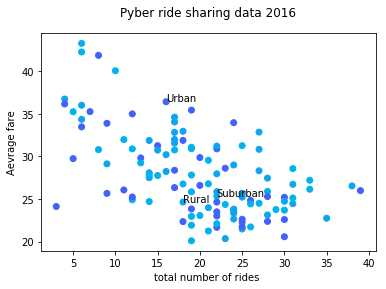

In [88]:
# Show plot
N=3
city_type=['Rural','Suburban','Urban']
Total_number_of_rides=total_rides
Average_fare=avg_fare_by_city 
ride = result["ride_id"]

# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(Total_number_of_rides,Average_fare,color=colors)
for i in range(N):
    plt.annotate(city_type[i],xy=(Total_number_of_rides[i],Average_fare[i]))
    plt.xlabel('total number of rides ')
    plt.ylabel('Aevrage fare')

# Move title up with the "y" option
plt.title('Pyber ride sharing data 2016',y=1.05)
plt.show()


## Total Fares by City Type

In [50]:
# Calculate Ride Percents
percent_fare = (grouped_type['fare'].sum()/result['fare'].sum())*100
percent_fare

type
Rural       13.571017
Suburban    31.532723
Urban       54.896261
Name: fare, dtype: float64

In [51]:
labels=["Rular","Suburban","Urban"]
sizes=[15.57,31.53,54.89]
colors=["red","orange","blue"]
explode = (0, 0, 0.1)

([<matplotlib.patches.Wedge at 0x179362c3550>,
 [Text(-1.07384,0.238474,'Rular'),
  Text(-0.365287,-1.03758,'Suburban'),
  Text(0.875825,0.820323,'Urban')],
 [Text(-0.58573,0.130077,'15.3%'),
  Text(-0.199248,-0.565951,'30.9%'),
  Text(0.510898,0.478522,'53.8%')])

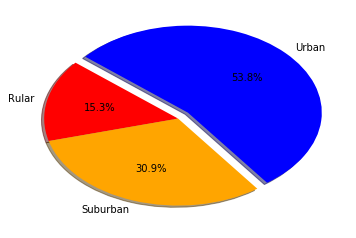

In [52]:
# Show Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Total Rides by City Type

In [66]:
percent_rides = (grouped_type['ride_id'].count()/result['ride_id'].count())*100
percent_rides

type
Rural       15.0
Suburban    30.0
Urban       55.0
Name: ride_id, dtype: float64

([<matplotlib.patches.Wedge at 0x17935120198>,
 [Text(-1.07181,0.247446,'Rular'),
  Text(-0.412067,-1.0199,'Suburban'),
  Text(0.905651,0.787271,'Urban')],
 [Text(-0.584622,0.134971,'15.0%'),
  Text(-0.224764,-0.55631,'30.0%'),
  Text(0.528297,0.459241,'55.0%')])

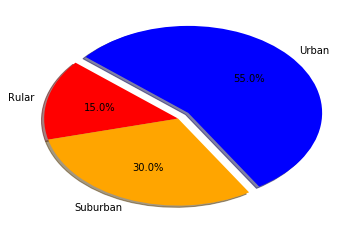

In [54]:
# Build Pie Chart
labels=["Rular","Suburban","Urban"]
sizes=[15,30,55]
colors=["red","orange","blue"]
explode = (0, 0, 0.1)
# Save Figure
# Show Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Total Drivers by City Type

In [60]:
# Calculate Driver Percents
percent_driver = (grouped_type['driver_count'].sum()/result['driver_count'].sum())*100
percent_driver
# Build Pie Charts

# Save Figure


type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

([<matplotlib.patches.Wedge at 0x17935068668>,
 [Text(-0.886219,0.651625,'Rular'),
  Text(-1.09821,0.0626555,'Suburban'),
  Text(1.19121,-0.14497,'Urban')],
 [Text(-0.483392,0.355432,'2.0%'),
  Text(-0.599026,0.0341757,'16.3%'),
  Text(0.694873,-0.084566,'81.6%')])

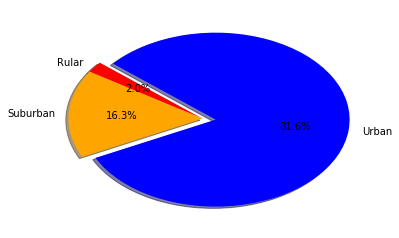

In [67]:
# Show Figure
labels=["Rular","Suburban","Urban"]
sizes=[2,16,80]
colors=["red","orange","blue"]
explode = (0, 0, 0.1)
# Save Figure
# Show Figure
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
